<a href="https://colab.research.google.com/github/Mahesha-uop/HealthGuardian-Disease-Risk-Detector-using-h2o-wave/blob/main/train/Lung_Cancer_Risk_Prediction_H2O_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 35 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

In [2]:
# If using google drive to have the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Install h2o if haven't installed
!pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=4e1de639607603c0a03303c67de98ae8cca60a73d1e7bba7e24a2c808b65bee5
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [4]:
 # Import necessary libraries from h2o
 import h2o
 from h2o.automl import H2OAutoML

In [5]:
# Check instance of H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpmwyieobx
  JVM stdout: /tmp/tmpmwyieobx/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpmwyieobx/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,2 months
H2O_cluster_name:,H2O_from_python_unknownUser_mpuwz6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [6]:
# Import data in csv as a dataframe
file_path = '/content/drive/MyDrive/Machine Learning/H2O /cancer patient data sets.csv' # Give the file path. In my case google drive
cancer_details_df = h2o.import_file(file_path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
# Recognize field in csv
cancer_details_df.types

{'index': 'int',
 'Patient Id': 'string',
 'Age': 'int',
 'Gender': 'int',
 'Air Pollution': 'int',
 'Alcohol use': 'int',
 'Dust Allergy': 'int',
 'OccuPational Hazards': 'int',
 'Genetic Risk': 'int',
 'chronic Lung Disease': 'int',
 'Balanced Diet': 'int',
 'Obesity': 'int',
 'Smoking': 'int',
 'Passive Smoker': 'int',
 'Chest Pain': 'int',
 'Coughing of Blood': 'int',
 'Fatigue': 'int',
 'Weight Loss': 'int',
 'Shortness of Breath': 'int',
 'Wheezing': 'int',
 'Swallowing Difficulty': 'int',
 'Clubbing of Finger Nails': 'int',
 'Frequent Cold': 'int',
 'Dry Cough': 'int',
 'Snoring': 'int',
 'Level': 'enum'}

In [8]:
# Visualize statics in data file
cancer_details_df.describe()

Rows:1000
Cols:26

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
type,int,string,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,enum
mins,0.0,NaN,14.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,
mean,499.5,NaN,37.17399999999998,1.4019999999999986,3.8400000000000025,4.563,5.165000000000006,4.8400000000000025,4.58,4.380000000000002,4.491000000000002,4.465000000000001,3.9480000000000044,4.1949999999999985,4.438,4.858999999999991,3.855999999999997,3.8550000000000004,4.240000000000004,3.777000000000001,3.7460000000000035,3.9229999999999996,3.536000000000002,3.853000000000001,2.925999999999997,
maxs,999.0,NaN,73.0,2.0,8.0,8.0,8.0,8.0,7.0,7.0,7.0,7.0,8.0,8.0,9.0,9.0,9.0,8.0,9.0,8.0,8.0,9.0,7.0,7.0,7.0,
sigma,288.8194360957494,NaN,12.005492736904051,0.4905472827736759,2.030399596759841,2.620476654713393,1.9808328295690911,2.107805219379352,2.1269988538135416,1.8485175187206142,2.135527915874543,2.124921243314746,2.4959017459678843,2.3117783888857772,2.2802094981284844,2.4279649943963384,2.2446162928888995,2.206545681340823,2.2850867864528954,2.0419207723220905,2.270382927754401,2.3880481096020167,1.8325015858279798,2.0390067553955165,1.4746859661292964,
zeros,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,P1,33.0,1.0,2.0,4.0,5.0,4.0,3.0,2.0,2.0,4.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,2.0,3.0,1.0,2.0,3.0,4.0,Low
1,1.0,P10,17.0,1.0,3.0,1.0,5.0,3.0,4.0,2.0,2.0,2.0,2.0,4.0,2.0,3.0,1.0,3.0,7.0,8.0,6.0,2.0,1.0,7.0,2.0,Medium
2,2.0,P100,35.0,1.0,4.0,5.0,6.0,5.0,5.0,4.0,6.0,7.0,2.0,3.0,4.0,8.0,8.0,7.0,9.0,2.0,1.0,4.0,6.0,7.0,2.0,High


In [9]:
# Split into train, validation and test data
cancer_data_train, cancer_data_test, cancer_data_valid = cancer_details_df.split_frame(ratios=[.8, .12])

In [10]:
# Visualize train data
cancer_data_train.head()

index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High
5,P102,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
6,P103,52,2,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
7,P104,28,2,3,1,4,3,2,3,4,3,1,4,3,1,3,2,2,4,2,2,3,4,3,Low
8,P105,35,2,4,5,6,5,6,5,5,5,6,6,6,5,1,4,3,2,4,6,2,4,1,Medium
9,P106,46,1,2,3,4,2,4,3,3,3,2,3,4,4,1,2,4,6,5,4,2,1,5,Medium


In [11]:
# Take necessary fields as x and y
y = "Level"
x = cancer_details_df.columns
x.remove(y)
x.remove("index")
x.remove("Patient Id")

In [12]:
# Train 10 models eliminating StackedEnsemble, DeepLearning
auto_ml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [13]:
# Train the model
auto_ml.train(x = x, y = y, training_frame = cancer_data_train, validation_frame= cancer_data_valid)

AutoML progress: |
11:16:52.214: Project: AutoML_1_20240221_111652
11:16:52.217: Cross-validation disabled by user: no fold column nor nfolds > 1.
11:16:52.218: Setting stopping tolerance adaptively based on the training frame: 0.035533452725935076
11:16:52.218: Build control seed: 10
11:16:52.219: training frame: Frame key: AutoML_1_20240221_111652_training_py_2_sid_9d36    cols: 26    rows: 792  chunks: 1    size: 30220  checksum: -5566629854813927728
11:16:52.219: validation frame: Frame key: py_4_sid_9d36    cols: 26    rows: 79  chunks: 1    size: 5352  checksum: -6341208183133918274
11:16:52.220: leaderboard frame: Frame key: py_4_sid_9d36    cols: 26    rows: 79  chunks: 1    size: 5352  checksum: -6341208183133918274
11:16:52.220: blending frame: NULL
11:16:52.220: response column: Level
11:16:52.220: fold column: null
11:16:52.220: weights column: null
11:16:52.241: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_se

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20240221_111652


Model Summary: 
    number_of_trees
--  -----------------
    60

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.002703027155775871
RMSE: 0.051990644887093596
LogLoss: 0.03535434456172324
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
High    Low    Medium    Error    Rate
------  -----  --------  -------  -------
295     0      0         0        0 / 295
0       244    0         0        0 / 244
0       0      253       0        0 / 253
295     244    253       0        0 / 792

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1

ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.005275996705767591
RMSE: 0.07263605651305412
LogLoss: 0.04752708399084262
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
High    Low    Medium    Error    Rate
------  -----  --------  -------  ------
22      0      0         0        0 / 22
0       23     0         0        0 / 23
0       0      34        0        0 / 34
22      23     34        0        0 / 79

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_logloss    training_classification_error    training_auc    training_pr_auc    validation_rmse    validation_logloss    validation_classification_error    validation_auc    validation_pr_auc
--  -------------------  ----------  -----------------  ---------------  ------------------  -------------------------------  --------------  -----------------  -----------------  --------------------  ---------------------------------  ----------------  -------------------
    2024-02-21 11:16:52  0.114 sec   0                  0.666667         1.09861             0.680556                         nan             nan                0.666667           1.09861               0.56962                            nan               nan
    2024-02-21 11:16:53  0.980 sec   5                  0.220264         0.238561            0                                nan             nan                0.24669            0.266867              0                                  nan               nan
    2024-02-21 11:16:53  1.117 sec   10                 0.101114         0.0902499           0                                nan             nan                0.130594           0.111839              0                                  nan               nan
    2024-02-21 11:16:53  1.193 sec   15                 0.0696702        0.0542786           0                                nan             nan                0.0962427          0.0719589             0                                  nan               nan
    2024-02-21 11:16:53  1.245 sec   20                 0.057851         0.0431361           0                                nan             nan                0.0823388          0.0594814             0                                  nan               nan
    2024-02-21 11:16:53  1.288 sec   25                 0.0526409        0.0387632           0                                nan             nan                0

In [14]:
# Get leader board to analysis performance of models
lb = auto_ml.leaderboard

In [15]:
lb.head()

model_id,mean_per_class_error,logloss,rmse,mse
XGBoost_1_AutoML_1_20240221_111652,0,0.0475271,0.0726361,0.005276
GBM_4_AutoML_1_20240221_111652,0,4.14439e-12,1.82475e-11,3.3297e-22
GBM_3_AutoML_1_20240221_111652,0,6.14839e-12,2.76147e-11,7.62572e-22
XRT_1_AutoML_1_20240221_111652,0,0.0923929,0.102912,0.0105908
GBM_1_AutoML_1_20240221_111652,0,6.27051e-09,1.07977e-08,1.1659e-16
XGBoost_2_AutoML_1_20240221_111652,0,0.0241674,0.0418191,0.00174884
GLM_1_AutoML_1_20240221_111652,0,0.00179887,0.00762026,5.80683e-05
GBM_2_AutoML_1_20240221_111652,0,6.32515e-12,2.65307e-11,7.03877e-22
XGBoost_3_AutoML_1_20240221_111652,0,0.0106038,0.0202251,0.000409056
DRF_1_AutoML_1_20240221_111652,0,0,0,0


In [16]:
# Predictions
cancer_pred = auto_ml.leader.predict(cancer_data_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [17]:
cancer_pred.head()

predict,High,Low,Medium
High,0.989675,0.00292707,0.00739804
Low,0.00341196,0.983009,0.0135787
High,0.952691,0.0338166,0.0134926
Low,0.00675073,0.978124,0.0151257
Low,0.00577607,0.922557,0.0716666
Medium,0.00550469,0.00923839,0.985257
Medium,0.00322162,0.00818449,0.988594
High,0.976495,0.00670231,0.0168027
High,0.982656,0.00906081,0.00828305
Medium,0.0073179,0.018591,0.974091


In [18]:
# Best model for predictions
auto_ml.leader.model_performance(cancer_data_test)

ModelMetricsMultinomial: xgboost
** Reported on test data. **

MSE: 0.004090832210997163
RMSE: 0.06395961390594196
LogLoss: 0.03995452701278298
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
High    Low    Medium    Error    Rate
------  -----  --------  -------  -------
48      0      0         0        0 / 48
0       36     0         0        0 / 36
0       0      45        0        0 / 45
48      36     45        0        0 / 129

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1

In [19]:
# Get model ids
model_ids = list(auto_ml.leaderboard['model_id'].as_data_frame().iloc[:,0])

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [20]:
model_ids

['XGBoost_1_AutoML_1_20240221_111652',
 'GBM_4_AutoML_1_20240221_111652',
 'GBM_3_AutoML_1_20240221_111652',
 'XRT_1_AutoML_1_20240221_111652',
 'GBM_1_AutoML_1_20240221_111652',
 'XGBoost_2_AutoML_1_20240221_111652',
 'GLM_1_AutoML_1_20240221_111652',
 'GBM_2_AutoML_1_20240221_111652',
 'XGBoost_3_AutoML_1_20240221_111652',
 'DRF_1_AutoML_1_20240221_111652']

In [21]:
# Get the output model
out= h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

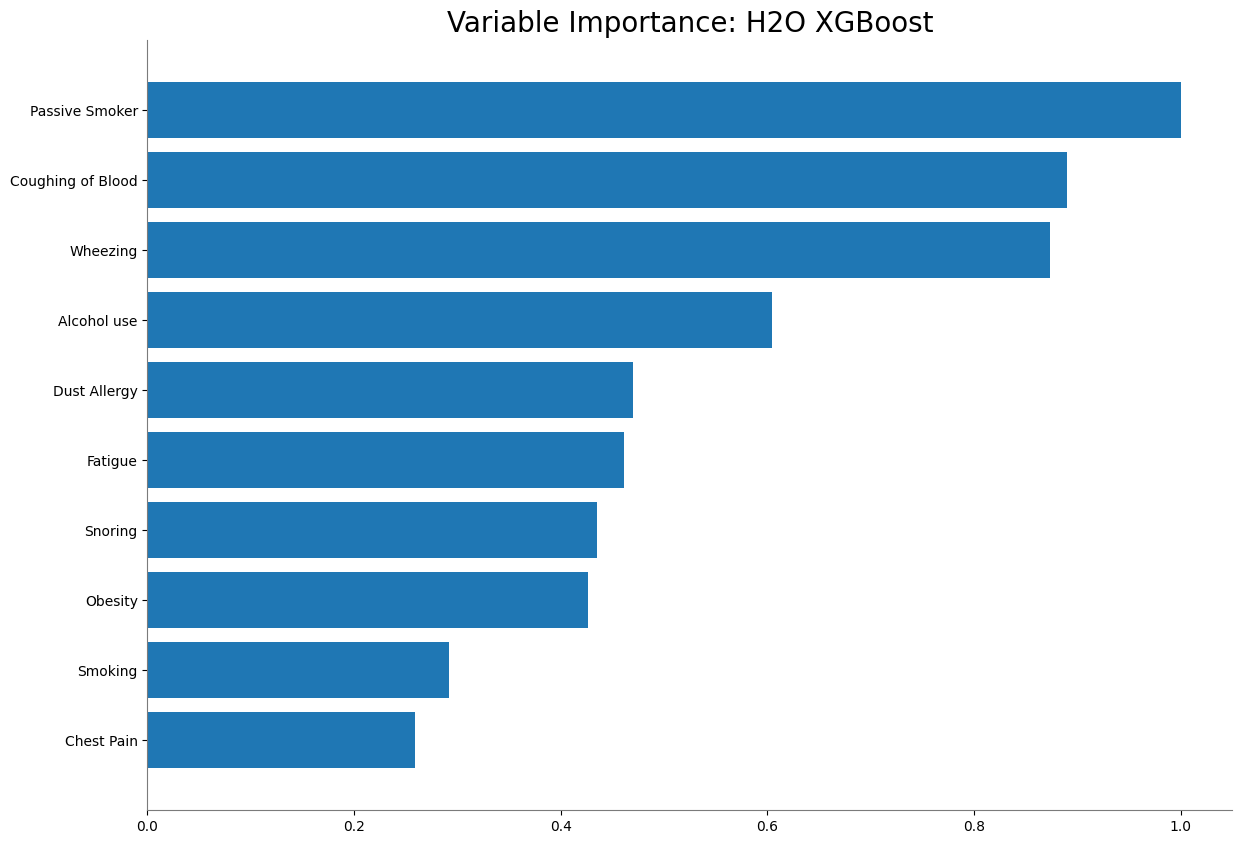

<Figure size 640x480 with 0 Axes>

In [22]:
# Plot varible importance
out.varimp_plot()

In [23]:
# Retrieve the variable importance
varimp =out.varimp(use_pandas=True)
varimp

,variable,relative_importance,scaled_importance,percentage
0,Passive Smoker,300.463135,1.000000,0.155415
1,Coughing of Blood,267.374695,0.889875,0.138300
2,Wheezing,262.283722,0.872931,0.135666
3,Alcohol use,181.707275,0.604757,0.093988
4,Dust Allergy,141.088593,0.469570,0.072978
5,Fatigue,138.560303,0.461156,0.071670
6,Snoring,130.577911,0.434589,0.067541
7,Obesity,128.056091,0.426196,0.066237
8,Smoking,87.688080,0.291843,0.045357
9,Chest Pain,77.654137,0.258448,0.040167


In [24]:
# Save the best model as a mojo
auto_ml.leader.download_mojo(path = "/content/drive/MyDrive/Machine Learning/Lung_cancer.zip")

'/content/drive/MyDrive/Machine Learning/Lung_cancer.zip'